<a href="https://colab.research.google.com/github/priyanka0591/Brain_Tumor_Detection_Using_MRI_Images/blob/main/brain_tumor_vgg_inception.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
ROOT_DIR = "/content/drive/MyDrive/brain tumor detection deep learning/dataset_brain_tumor"

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # split the dataset into train and validation sets

In [ ]:
train_generator = train_datagen.flow_from_directory(
    ROOT_DIR,
    target_size=(128, 128), # VGG input size
    batch_size=32,
    class_mode='binary',
    subset='training') # use the training set

Found 2668 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    ROOT_DIR,
    target_size=(128, 128), # VGG input size
    batch_size=32,
    class_mode='binary',
    subset='validation') # use the validation set

Found 666 images belonging to 2 classes.


In [ ]:
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(128, 128, 3)) # load the pre-trained VGG model

58889256/58889256 [==============================] - 4s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False # freeze the pre-trained layers

In [ ]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x) # add new layers for classification

In [ ]:
model = models.Model(inputs=base_model.input, outputs=x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=10, 
                    validation_data=validation_generator)

Epoch 1/10
84/84 [==============================] - 30s 363ms/step - loss: 0.2018 - accuracy: 0.9168 - val_loss: 0.4107 - val_accuracy: 0.8048
Epoch 2/10
84/84 [==============================] - 22s 258ms/step - loss: 0.1709 - accuracy: 0.9269 - val_loss: 0.2718 - val_accuracy: 0.8829
Epoch 3/10
84/84 [==============================] - 20s 239ms/step - loss: 0.1427 - accuracy: 0.9374 - val_loss: 0.3093 - val_accuracy: 0.8724
Epoch 4/10
84/84 [==============================] - 23s 272ms/step - loss: 0.1329 - accuracy: 0.9509 - val_loss: 0.2735 - val_accuracy: 0.8949
Epoch 5/10
84/84 [==============================] - 21s 254ms/step - loss: 0.1248 - accuracy: 0.9501 - val_loss: 0.2501 - val_accuracy: 0.9024
Epoch 6/10
84/84 [==============================] - 20s 239ms/step - loss: 0.1175 - accuracy: 0.9561 - val_loss: 0.3054 - val_accuracy: 0.8784
Epoch 7/10
84/84 [==============================] - 26s 311ms/step - loss: 0.1016 - accuracy: 0.9625 - val_loss: 0.2754 - val_accuracy: 0.8964

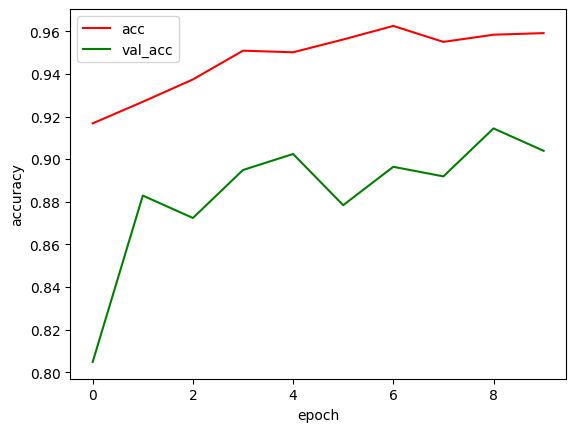

In [ ]:
plt.plot(history.history['accuracy'],label='acc', color='red')
plt.plot(history.history['val_accuracy'],label='val_acc', color='green')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

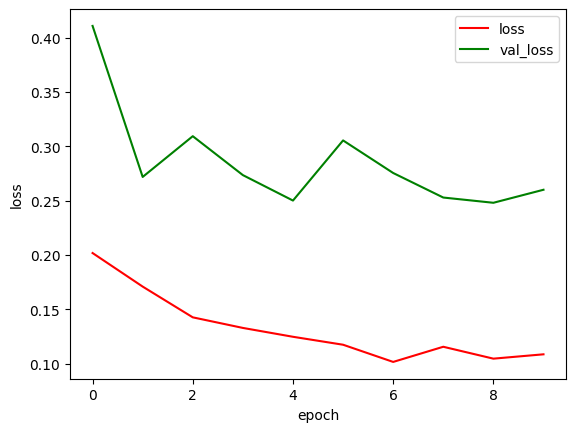

In [ ]:
plt.plot(history.history['loss'],label='loss', color='red')
plt.plot(history.history['val_loss'],label='val_loss', color='green')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

In [ ]:
from tensorflow.keras.applications import InceptionV3

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

87910968/87910968 [==============================] - 6s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

In [ ]:
model = models.Model(inputs=base_model.input, outputs=x)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
84/84 [==============================] - 31s 293ms/step - loss: 0.5041 - accuracy: 0.8718 - val_loss: 0.3647 - val_accuracy: 0.8604
Epoch 2/10
84/84 [==============================] - 20s 243ms/step - loss: 0.2077 - accuracy: 0.9209 - val_loss: 0.4051 - val_accuracy: 0.8243
Epoch 3/10
84/84 [==============================] - 22s 256ms/step - loss: 0.1950 - accuracy: 0.9232 - val_loss: 0.3690 - val_accuracy: 0.8468
Epoch 4/10
84/84 [==============================] - 21s 246ms/step - loss: 0.1874 - accuracy: 0.9265 - val_loss: 0.2926 - val_accuracy: 0.8709
Epoch 5/10
84/84 [==============================] - 21s 246ms/step - loss: 0.1720 - accuracy: 0.9310 - val_loss: 0.3509 - val_accuracy: 0.8694
Epoch 6/10
84/84 [==============================] - 22s 257ms/step - loss: 0.1456 - accuracy: 0.9449 - val_loss: 0.3193 - val_accuracy: 0.8814
Epoch 7/10
84/84 [==============================] - 20s 244ms/step - loss: 0.1438 - accuracy: 0.9400 - val_loss: 0.3469 - val_accuracy: 0.8544

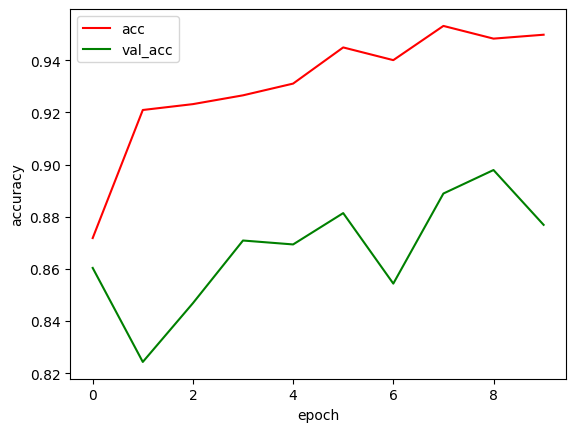

In [ ]:
plt.plot(history.history['accuracy'],label='acc', color='red')
plt.plot(history.history['val_accuracy'],label='val_acc', color='green')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
from tensorflow.keras.applications import MobileNet

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(inputs=base_model.input, outputs=x)

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)


17225924/17225924 [==============================] - 2s 0us/step


Epoch 1/10
84/84 [==============================] - 24s 257ms/step - loss: 0.2297 - accuracy: 0.9202 - val_loss: 0.3089 - val_accuracy: 0.8829
Epoch 2/10
84/84 [==============================] - 20s 243ms/step - loss: 0.1278 - accuracy: 0.9565 - val_loss: 0.2466 - val_accuracy: 0.9114
Epoch 3/10
84/84 [==============================] - 19s 231ms/step - loss: 0.1040 - accuracy: 0.9610 - val_loss: 0.2297 - val_accuracy: 0.9174
Epoch 4/10
84/84 [==============================] - 21s 246ms/step - loss: 0.0810 - accuracy: 0.9711 - val_loss: 0.2191 - val_accuracy: 0.9279
Epoch 5/10
84/84 [==============================] - 20s 241ms/step - loss: 0.0794 - accuracy: 0.9700 - val_loss: 0.2176 - val_accuracy: 0.9189
Epoch 6/10
84/84 [==============================] - 20s 233ms/step - loss: 0.0734 - accuracy: 0.9734 - val_loss: 0.1896 - val_accuracy: 0.9354
Epoch 7/10
84/84 [==============================] - 20s 242ms/step - loss: 0.0666 - accuracy: 0.9756 - val_loss: 0.2119 - val_accuracy: 0.9234

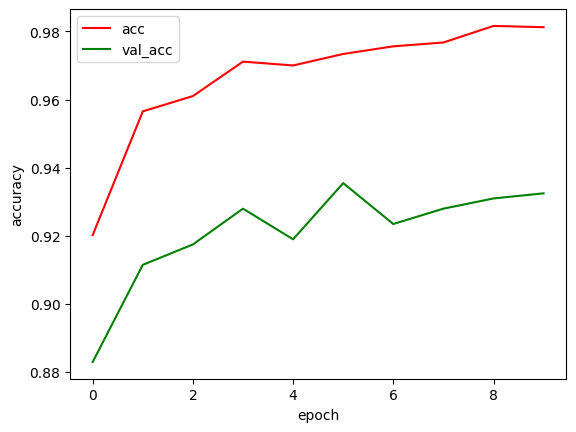

In [ ]:
plt.plot(history.history['accuracy'],label='acc', color='red')
plt.plot(history.history['val_accuracy'],label='val_acc', color='green')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
from tensorflow.keras.applications import ResNet50

# load the pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

for layer in base_model.layers:
    layer.trainable = False # freeze the pre-trained layers

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x) # add new layers for classification

# create a model
model = models.Model(inputs=base_model.input, outputs=x)

# compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),
              metrics=['accuracy'])

# train the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

94765736/94765736 [==============================] - 5s 0us/step


Epoch 1/10
84/84 [==============================] - 29s 289ms/step - loss: 0.4375 - accuracy: 0.8392 - val_loss: 0.4463 - val_accuracy: 0.8183
Epoch 2/10
84/84 [==============================] - 27s 328ms/step - loss: 0.4014 - accuracy: 0.8501 - val_loss: 0.4640 - val_accuracy: 0.8123
Epoch 3/10
84/84 [==============================] - 25s 292ms/step - loss: 0.3765 - accuracy: 0.8579 - val_loss: 0.4656 - val_accuracy: 0.8108
Epoch 4/10
84/84 [==============================] - 21s 247ms/step - loss: 0.3648 - accuracy: 0.8576 - val_loss: 0.4675 - val_accuracy: 0.8003
Epoch 5/10
84/84 [==============================] - 22s 262ms/step - loss: 0.3518 - accuracy: 0.8617 - val_loss: 0.4626 - val_accuracy: 0.8153
Epoch 6/10
84/84 [==============================] - 22s 261ms/step - loss: 0.3400 - accuracy: 0.8654 - val_loss: 0.4768 - val_accuracy: 0.7988
Epoch 7/10
84/84 [==============================] - 21s 246ms/step - loss: 0.3372 - accuracy: 0.8617 - val_loss: 0.4539 - val_accuracy: 0.8153

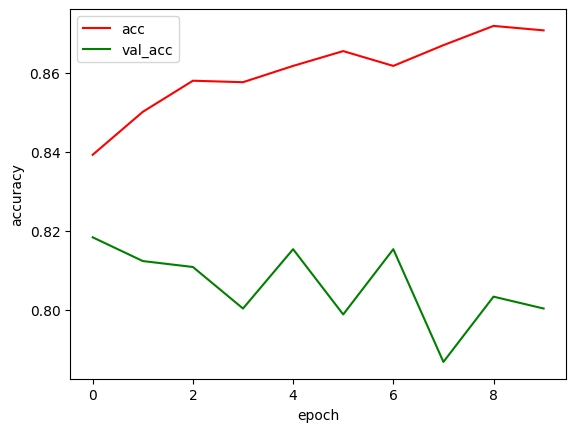

In [ ]:
plt.plot(history.history['accuracy'],label='acc', color='red')
plt.plot(history.history['val_accuracy'],label='val_acc', color='green')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()